# Peer-graded Assignment: Course Project 2

## 1. Questions & Answers
- Across the United States, which types of events (as indicated in the EVTYPE variable) are most harmful with respect to population health?
    - **Tornados have caused greated number of fatalities (5,633) and injuries (91,347)**
- Across the United States, which types of events have the greatest economic consequences?
    - **Floods have caused the most significant damage 144.7 Billion USD, followd by HURRICANE/TYPHOON with 69.3 Billion USD damage**

## 2. Data Processing
### 2.1 Environment

In [29]:
setwd("~/Soft/Rtest/datasciencecoursera/05_Reproducible_Research/")
library("data.table")
library("ggplot2")

### 2.2 Data download

In [4]:
# defile the url
bfileUrl <- "https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2FStormData.csv.bz2"
# download the file into ./data/
download.file(fileUrl, destfile = "./data/repdata_data_StormData.csv.bz2")


In [1]:
# load data frame
storm <- read.csv("./data/repdata_data_StormData.csv.bz2")

In [2]:
head(storm)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,⋯,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,4/18/1950 0:00:00,0130,CST,97,MOBILE,AL,TORNADO,0,,⋯,,,,,3040,8812,3051,8806,,1
2,1,4/18/1950 0:00:00,0145,CST,3,BALDWIN,AL,TORNADO,0,,⋯,,,,,3042,8755,0,0,,2
3,1,2/20/1951 0:00:00,1600,CST,57,FAYETTE,AL,TORNADO,0,,⋯,,,,,3340,8742,0,0,,3
4,1,6/8/1951 0:00:00,0900,CST,89,MADISON,AL,TORNADO,0,,⋯,,,,,3458,8626,0,0,,4
5,1,11/15/1951 0:00:00,1500,CST,43,CULLMAN,AL,TORNADO,0,,⋯,,,,,3412,8642,0,0,,5
6,1,11/15/1951 0:00:00,2000,CST,77,LAUDERDALE,AL,TORNADO,0,,⋯,,,,,3450,8748,0,0,,6


In [3]:
# shape of data frame
dim(storm) # 902297 x 37

[1] 902297     37

In [4]:
str(storm)

'data.frame':	902297 obs. of  37 variables:
 $ STATE__   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ BGN_DATE  : chr  "4/18/1950 0:00:00" "4/18/1950 0:00:00" "2/20/1951 0:00:00" "6/8/1951 0:00:00" ...
 $ BGN_TIME  : chr  "0130" "0145" "1600" "0900" ...
 $ TIME_ZONE : chr  "CST" "CST" "CST" "CST" ...
 $ COUNTY    : num  97 3 57 89 43 77 9 123 125 57 ...
 $ COUNTYNAME: chr  "MOBILE" "BALDWIN" "FAYETTE" "MADISON" ...
 $ STATE     : chr  "AL" "AL" "AL" "AL" ...
 $ EVTYPE    : chr  "TORNADO" "TORNADO" "TORNADO" "TORNADO" ...
 $ BGN_RANGE : num  0 0 0 0 0 0 0 0 0 0 ...
 $ BGN_AZI   : chr  "" "" "" "" ...
 $ BGN_LOCATI: chr  "" "" "" "" ...
 $ END_DATE  : chr  "" "" "" "" ...
 $ END_TIME  : chr  "" "" "" "" ...
 $ COUNTY_END: num  0 0 0 0 0 0 0 0 0 0 ...
 $ COUNTYENDN: logi  NA NA NA NA NA NA ...
 $ END_RANGE : num  0 0 0 0 0 0 0 0 0 0 ...
 $ END_AZI   : chr  "" "" "" "" ...
 $ END_LOCATI: chr  "" "" "" "" ...
 $ LENGTH    : num  14 2 0.1 0 0 1.5 1.5 0 3.3 2.3 ...
 $ WIDTH     : num  100 150 123 100 15

In [5]:
# event types
length(unique(storm$EVTYPE)) # 985 event types

[1] 985

According to the [Storm Data Documentation](https://d396qusza40orc.cloudfront.net/repdata%2Fpeer2_doc%2Fpd01016005curr.pdf), the health variables include `FATALITIES` and `INJURIES`. with datamage to property `PROPDMG` and to crops `CROPDMG` We narrow down the column numbers to accelerate following analytics

### 2.3 Data subset

In [6]:
colList <- c("EVTYPE"
             , "FATALITIES"
             , "INJURIES"
             , "PROPDMG"
             , "PROPDMGEXP"
             , "CROPDMG"
             , "CROPDMGEXP"
)
storm <- storm[, colList]
head(storm)

,EVTYPE,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,TORNADO,0,15,25.0,K,0,
2,TORNADO,0,0,2.5,K,0,
3,TORNADO,0,2,25.0,K,0,
4,TORNADO,0,2,2.5,K,0,
5,TORNADO,0,2,2.5,K,0,
6,TORNADO,0,6,2.5,K,0,


There is 1 observation with `ENVTYPE == "?"` which should be removed as well

In [7]:
# sum(storm$EVTYPE=="?") # 1
# storm[(storm$EVTYPE=="?"), ] # may be due to measurement error
#storm <- 
storm <- storm[(storm$EVTYPE!="?"), ]

We see the following 4 columns have zero values (lucily there are no negative values), meaning it caused no harm to population health, and are also removed by rows

### 2.4 Missing values

In [8]:
summary(storm$INJURIES)
summary(storm$FATALITIES)
summary(storm$PROPDMG)
summary(storm$CROPDMG)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.0000    0.0000    0.0000    0.1557    0.0000 1700.0000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0000   0.0000   0.0168   0.0000 583.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   12.06    0.50 5000.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.527   0.000 990.000 

In [9]:
storm <- storm[(storm$INJURIES > 0 | storm$FATALITIES > 0 | storm$PROPDMG > 0 | storm$CROPDMG > 0),]
dim(storm) # (902297x37) --> (254632x7)
head(storm)

[1] 254632      7

,EVTYPE,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,TORNADO,0,15,25.0,K,0,
2,TORNADO,0,0,2.5,K,0,
3,TORNADO,0,2,25.0,K,0,
4,TORNADO,0,2,2.5,K,0,
5,TORNADO,0,2,2.5,K,0,
6,TORNADO,0,6,2.5,K,0,


### 2.5 -EXP column conversions

Change PROPDMGEXP and CROPDMG columns into upper case

In [10]:
storm$PROPDMGEXP <- toupper(storm$PROPDMGEXP)
storm$CROPDMGEXP <- toupper(storm$CROPDMGEXP)

In [11]:
unique(storm$PROPDMGEXP)

[1] "K" "M" ""  "B" "+" "0" "5" "6" "4" "H" "2" "7" "3" "-"

In [12]:
unique(storm$CROPDMGEXP)

[1] ""  "M" "K" "B" "?" "0"

Map property damage alphanumeric exponents to numeric values

In [17]:
propDmgKey <-  c("\"\"" = 10^0,
                 "-" = 10^0, 
                 "+" = 10^0,
                 "0" = 10^0,
                 "1" = 10^1,
                 "2" = 10^2,
                 "3" = 10^3,
                 "4" = 10^4,
                 "5" = 10^5,
                 "6" = 10^6,
                 "7" = 10^7,
                 "8" = 10^8,
                 "9" = 10^9,
                 "H" = 10^2,
                 "K" = 10^3,
                 "M" = 10^6,
                 "B" = 10^9)
storm$PROPDMGEXP <- propDmgKey[as.character(storm$PROPDMGEXP)]
storm[is.na(storm[,'PROPDMGEXP']),'PROPDMGEXP'] <- 10^0

Map crop damage alphanumeric exponents to numeric values

In [18]:
cropDmgKey <-  c("\"\"" = 10^0,
                "?" = 10^0, 
                "0" = 10^0,
                "K" = 10^3,
                "M" = 10^6,
                "B" = 10^9)
storm$CROPDMGEXP <- cropDmgKey[as.character(storm$CROPDMGEXP)]
storm[is.na(storm[,'CROPDMGEXP']),'CROPDMGEXP'] <- 10^0

### 2.6 Calculate economic cost for property and crop

In [24]:
## add 2 new columns in storm
## propCost = PROPDMG * PROPDMGEXP
## cropCost = CROPDMG * CROPDMGEXP
storm$propCost = storm$PROPDMG * storm$PROPDMGEXP
storm$cropCost = storm$CROPDMG * storm$CROPDMGEXP

Calculate cost by EVTYPE

In [25]:
head(storm)

,EVTYPE,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,propCost,cropCost
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TORNADO,0,15,25.0,1000,0,1,25000,0
2,TORNADO,0,0,2.5,1000,0,1,2500,0
3,TORNADO,0,2,25.0,1000,0,1,25000,0
4,TORNADO,0,2,2.5,1000,0,1,2500,0
5,TORNADO,0,2,2.5,1000,0,1,2500,0
6,TORNADO,0,6,2.5,1000,0,1,2500,0


In [31]:
storm <- as.data.table(storm)
storm <- storm[, .(EVTYPE
          , FATALITIES
          , INJURIES
          , PROPDMG
          , PROPDMGEXP
          , propCost = PROPDMG * PROPDMGEXP
          , cropCost = CROPDMG * CROPDMGEXP
         )]

In [63]:
#storm <- as.data.table(storm)
totalCostDT <- storm[, .(propCost = sum(propCost)
                     , cropCost = sum(cropCost)
                     , totalCost = sum(propCost) + sum(cropCost)
                     ), by = .(EVTYPE)]
totalCostDT <- totalCostDT[order(-totalCost),]
totalCostDT <- totalCostDT[1:10, ]
head(totalCostDT)

EVTYPE,propCost,cropCost,totalCost
<chr>,<dbl>,<dbl>,<dbl>
FLOOD,144657709870,168037.88,144657877908
HURRICANE/TYPHOON,69305840000,4798.48,69305844798
TORNADO,56947380704,100018.52,56947480722
STORM SURGE,43323536000,5.00,43323536005
FLASH FLOOD,16822675842,179200.46,16822855042
HAIL,15735268026,579596.28,15735847622


###  2.7 Calculate total fatalities and injuries

In [40]:
totalFatalitiesDT <- storm[, .(FATALITIES = sum(FATALITIES)
                             , INJURIES = sum(INJURIES)
                             , totalS = sum(FATALITIES) + sum(INJURIES))
                          , by = .(EVTYPE)]
totalFatalitiesDT <- totalFatalitiesDT[order(-FATALITIES)]
totalFatalitiesDT <- totalFatalitiesDT[1:10,]
head(totalFatalitiesDT)

EVTYPE,FATALITIES,INJURIES,totalS
<chr>,<dbl>,<dbl>,<dbl>
TORNADO,5633,91346,96979
EXCESSIVE HEAT,1903,6525,8428
FLASH FLOOD,978,1777,2755
HEAT,937,2100,3037
LIGHTNING,816,5230,6046
TSTM WIND,504,6957,7461


In [70]:
totalFatalitiesDT[EVTYPE == "TORNADO",]

EVTYPE,FATALITIES,INJURIES,totalS
<chr>,<dbl>,<dbl>,<dbl>
TORNADO,5633,91346,96979


## 3. Answers
### 3.1 Across the United States, which types of events (as indicated in the EVTYPE variable) are most harmful with respect to population health?

In [251]:
#?melt

In [41]:
harmful_events <- melt(
    totalFatalitiesDT
    , id.vars = 'EVTYPE'
    , variable.name = "harm"
)

In [42]:
head(harmful_events)

EVTYPE,harm,value
<chr>,<fct>,<dbl>
TORNADO,FATALITIES,5633
EXCESSIVE HEAT,FATALITIES,1903
FLASH FLOOD,FATALITIES,978
HEAT,FATALITIES,937
LIGHTNING,FATALITIES,816
TSTM WIND,FATALITIES,504


In [43]:
str(harmful_events)

Classes ‘data.table’ and 'data.frame':	30 obs. of  3 variables:
 $ EVTYPE: chr  "TORNADO" "EXCESSIVE HEAT" "FLASH FLOOD" "HEAT" ...
 $ harm  : Factor w/ 3 levels "FATALITIES","INJURIES",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value : num  5633 1903 978 937 816 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [44]:
str(harmful_events$harm)

 Factor w/ 3 levels "FATALITIES","INJURIES",..: 1 1 1 1 1 1 1 1 1 1 ...


In [45]:
names(harmful_events)

[1] "EVTYPE" "harm"   "value"

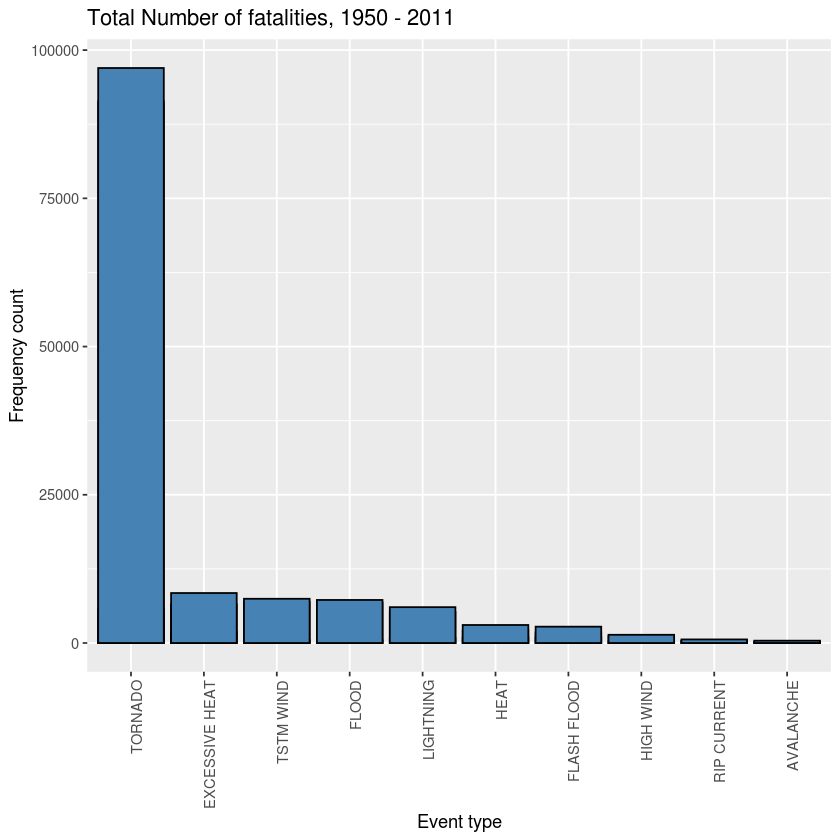

In [52]:
g <- ggplot(data = harmful_events
           , aes(x = reorder(EVTYPE, -value)
                , y = value)
           )
g <- g + geom_bar(
    color = "black"
    , stat = 'identity'
    , fill = "steelblue"
    , position = 'dodge'
)
g <- g + xlab("Event type") + ylab("Frequency count")
g <- g + ggtitle("Total Number of fatalities, 1950 - 2011")
g <- g + theme(axis.text.x = element_text(angle = 90, hjust = 1))
g

### 3.2 Across the United States, which types of events (as indicated in the EVTYPE variable) are most harmful with respect to population health?

In [64]:
econ_consequences <- melt(totalCostDT, id.vars = 'EVTYPE', variable.name = "Damage_Type")
head(econ_consequences)

EVTYPE,Damage_Type,value
<chr>,<fct>,<dbl>
FLOOD,propCost,144657709870
HURRICANE/TYPHOON,propCost,69305840000
TORNADO,propCost,56947380704
STORM SURGE,propCost,43323536000
FLASH FLOOD,propCost,16822675842
HAIL,propCost,15735268026


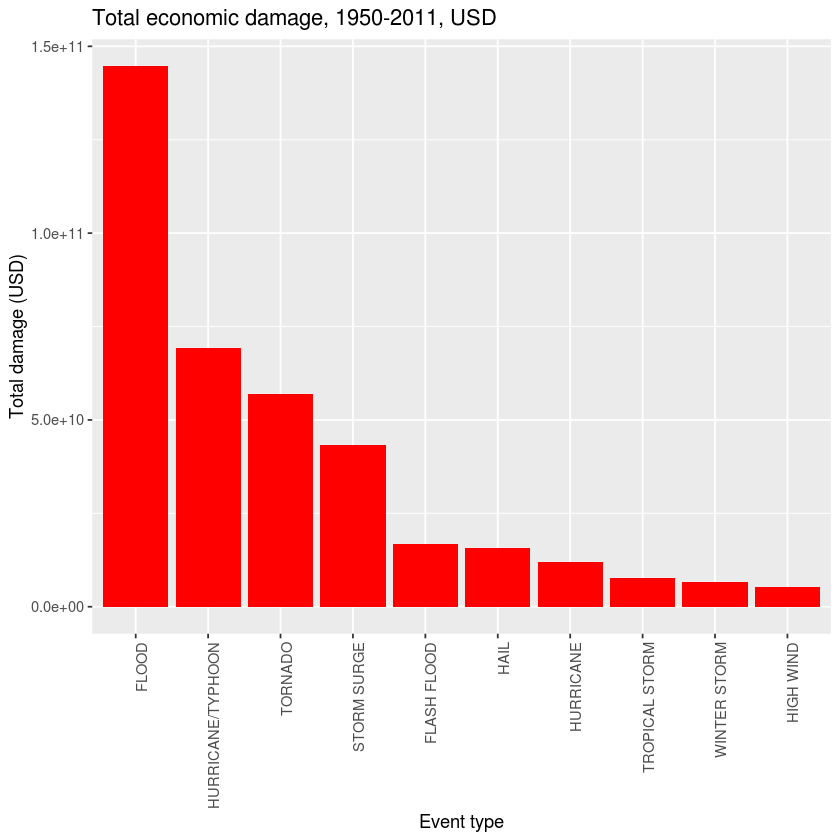

In [71]:
g <- NULL
g <- ggplot(data = econ_consequences, aes(x = reorder(EVTYPE, -value), y = value))
g <- g + geom_bar(stat = 'identity', fill = 'red', position = "dodge")
g <- g + xlab("Event type") + ylab("Total damage (USD)")
g <- g + ggtitle("Total economic damage, 1950-2011, USD")
g <- g + theme(axis.text.x = element_text(angle = 90, hjust = 1))
g